<a href="https://colab.research.google.com/github/GerardNgabo/HousePricePrediction/blob/master/housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google import colab
colab.drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os 

path = '/content/gdrive/My Drive/colab/' # specify your directory where you want to create a folder for storing data.
os.chdir(path) # change directory.

new_folder_name='prices' # create a folder for storing data.

if not os.path.exists(new_folder_name): # create a folder for storing data if it does not exist.
    os.mkdir(new_folder_name) # make a directory

os.chdir(path + '/' + new_folder_name) # change directory

print("Current directory:", os.getcwd())

Current directory: /content/gdrive/My Drive/colab/prices


In [ ]:
from google.colab import files
files.upload() # upload kaggle.json

{}

In [ ]:
!pip install kaggle
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [ ]:
!kaggle datasets download camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import glob
import zipfile
zipfiles = glob.glob(os.getcwd() + '/*.zip')
zipfiles


local_zip =zipfiles[0] # specify where train.zip is
zip_ref = zipfile.ZipFile(local_zip, 'r')  # create a ZipFile object
zip_ref.extractall() # create a folder in the current directory and get all data
zip_ref.close() # close

In [ ]:
!ls '/content/gdrive/My Drive/colab/prices'
base_folder = '/content/gdrive/My Drive/colab/prices'

california-housing-prices.zip  housing.csv  kaggle.json


In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time

In [31]:
df = pd.read_csv(base_folder+'/housing.csv')
df.head()
df.drop([0])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Exploring the data**

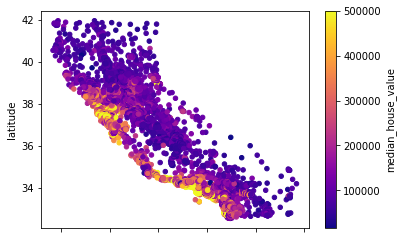

In [ ]:
# plot the houses' location
ax1 = df.plot.scatter(x='longitude',y='latitude',c = 'median_house_value',colormap='plasma')

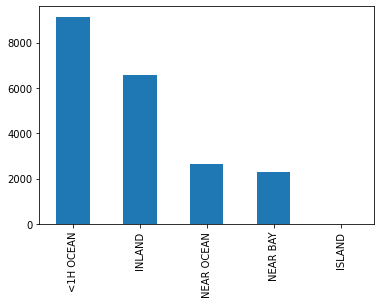

In [ ]:
# plot ocean proximity
# df['ocean_proximity']

df['ocean_proximity'].value_counts().plot(kind='bar')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# le = preprocessing.OneHotEncoder()
# op = pd.get_dummies(df.ocean_proximity)

df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])


In [ ]:
#Exercise- Explore the other variables by plotting them
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
#looking at correlation of the different variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
#split data into training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value','ocean_proximity'], axis=1)
# X= X.fillna(0)
X= X.fillna(X.mean())
# x= preprocessing.normalize(X)

y = df['median_house_value']


original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(original_Xtrain, original_ytrain)
pred = clf.predict(original_Xtest)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

r2_score(original_ytest.to_numpy(), pred)

0.6143987268246052

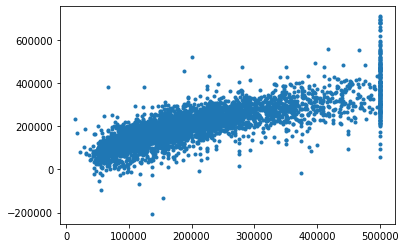

In [ ]:
plt.plot(original_ytest, pred, '.')

In [ ]:
# try a decision tree regression
# try a random forest
# try an support vector regresssor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0).fit(original_Xtrain, original_ytrain)
pred = dtr.predict(original_Xtest)

from sklearn.metrics import r2_score

r2_score(original_ytest.to_numpy(), pred)

0.6375772782995022

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0).fit(original_Xtrain, original_ytrain)
# max_depth=2, random_state=0
pred = rfr.predict(original_Xtest)

from sklearn.metrics import r2_score

r2_score(original_ytest.to_numpy(), pred)


0.8108736043187332